In [3]:
import pandas as pd


In [4]:
df = pd.read_csv("heights.csv")
df.head()

,name,height
0,mohan,1.2
1,maria,4.6
2,sakib,4.9
3,tao,5.1
4,virat,5.2


In [5]:
Q1 ,Q3 = df.height.quantile([0.25,0.75])
Q1 ,Q3

(5.3500000000000005, 6.275)

In [6]:
IQR = Q3-Q1
IQR

0.9249999999999998

In [7]:
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
lower , upper

(3.962500000000001, 7.6625)

In [8]:
df[(df.height<lower)| (df.height>upper)]

,name,height
0,mohan,1.2
19,Liu,40.2


In [9]:
df_new = df[(df.height>lower)& (df.height<upper)]
df_new

,name,height
1,maria,4.6
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6
10,jose,5.8


Outlier Removal Using BoxPlot

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel("region_wise_sales.xlsx")
df.head()

,Month,Year,Region,Sales
0,January,2022,APAC,36750
1,February,2022,APAC,36995
2,March,2022,APAC,18579
3,April,2022,APAC,37768
4,May,2022,APAC,23956


In [20]:
labels = df.Region.unique()

In [12]:
df_apac = df[df.Region == "APAC"]
df_europe = df[df.Region == "Europe"]
df_americas = df[df.Region == "Americas"]

In [15]:
def get_lower_upper(data):
    Q1,Q3 = data.Sales.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower , upper

lower, upper = get_lower_upper(df_apac)
lower, upper

(-737.125, 59747.875)

In [16]:
df_apac.describe()

,Year,Sales
count,12.0,12.000000
mean,2022.0,29762.166667
std,0.0,7725.522905
min,2022.0,18579.000000
25%,2022.0,21944.750000
50%,2022.0,31215.500000
75%,2022.0,37066.000000
max,2022.0,38143.000000


In [18]:
lower,upper = get_lower_upper(df_europe)
lower,upper

(7306.875, 17665.875)

In [19]:
df_europe[df_europe.Sales>upper]

,Month,Year,Region,Sales
21,October,2022,Europe,23000


In [21]:
plot_data = [df['Sales'][df['Region']==label].values for label in labels ]
plot_data

[array([36750, 36995, 18579, 37768, 23956, 38143, 29132, 21961, 33299,
        37279, 21388, 21896]),
 array([ 9665, 10297, 11079, 13410, 11229, 15352, 13286, 11470, 11873,
        23000, 12215, 14895]),
 array([30247, 29284, 27904, 23407, 23716, 25077, 33649, 24560, 34102,
        28257, 30691, 29387])]

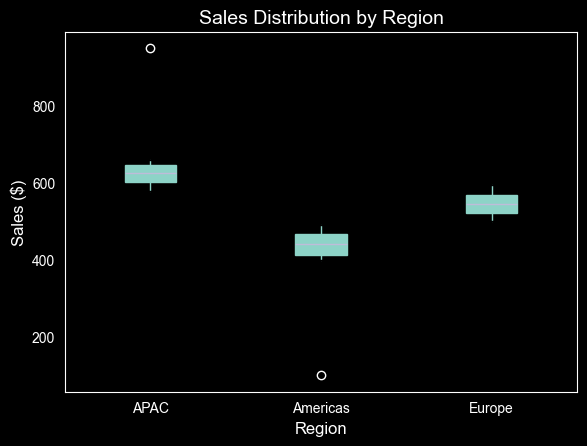

In [22]:
data = {
    'Region': ['APAC', 'Americas', 'Europe'] * 10,
    'Sales': [600, 450, 550, 950, 400, 520, 580, 430, 540, 610,
              460, 560, 620, 100, 570, 590, 470, 530, 640, 480,
              510, 630, 490, 500, 650, 410, 595, 660, 420, 585]
}
df = pd.DataFrame(data)

# 2. Create the boxplot
# 'column' is what you want to measure (Sales)
# 'by' is how you want to group it (Region)
plt.figure(figsize=(10, 6))
df.boxplot(column='Sales', by='Region', vert = True, patch_artist=True)

# 3. Add Labels and Titles
# boxplot() automatically adds a "Boxplot grouped by..." title,
# you can clear it using plt.suptitle('')
plt.suptitle('')
plt.title('Sales Distribution by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)

# 4. Show the plot
plt.show()

# Optional: To save the plot
# plt.savefig('sales_boxplot_matplotlib.png')